In [ ]:
# THIS REFERS TO TITANIC ASSIGNMENT



import pandas as pd
import numpy as np
from math import cos,sin,pi
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
d=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SVMtrain.csv")

In [ ]:
d

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [ ]:
d.count()

PassengerId    889
Survived       889
Pclass         889
Sex            889
Age            889
SibSp          889
Parch          889
Fare           889
Embarked       889
dtype: int64

In [ ]:
d.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


<ipython-input-23-764e7c1e3e3a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(d, x='Age', y='Sex', inner='box', palette='Dark2')


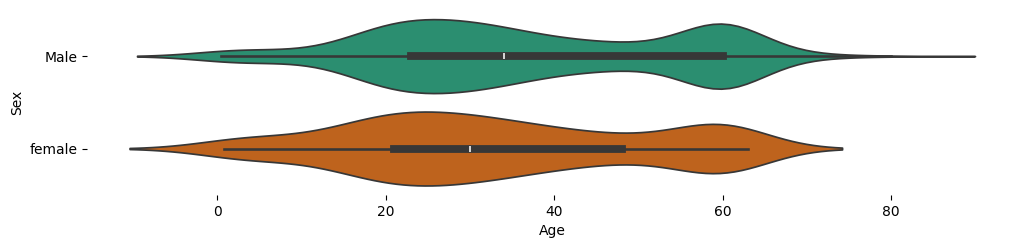

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(d['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(d, x='Age', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

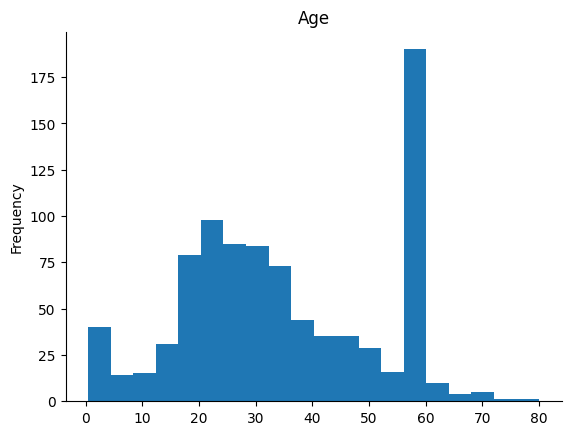

In [ ]:


from matplotlib import pyplot as plt
d['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-19-8eb130dd0df5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(d, x='Survived', y='Sex', inner='box', palette='Dark2')


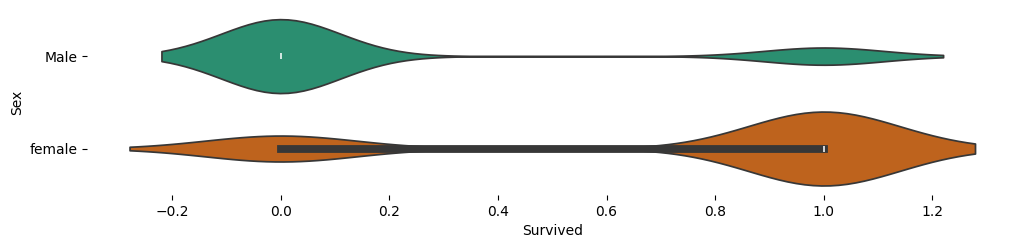

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(d['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(d, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

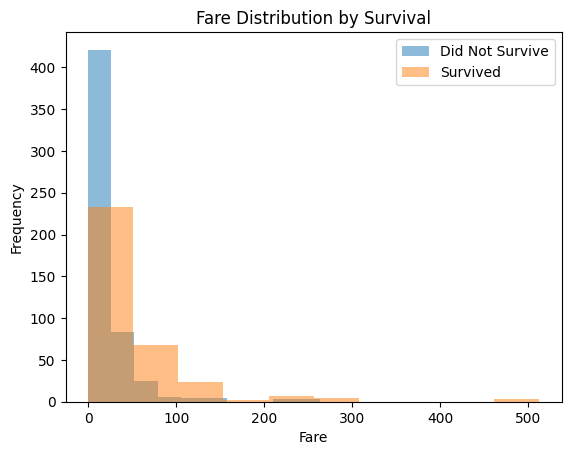

In [ ]:


import matplotlib.pyplot as plt

plt.hist(d[d['Survived'] == 0]['Fare'], alpha=0.5, label='Did Not Survive')
plt.hist(d[d['Survived'] == 1]['Fare'], alpha=0.5, label='Survived')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
_ = plt.title('Fare Distribution by Survival')

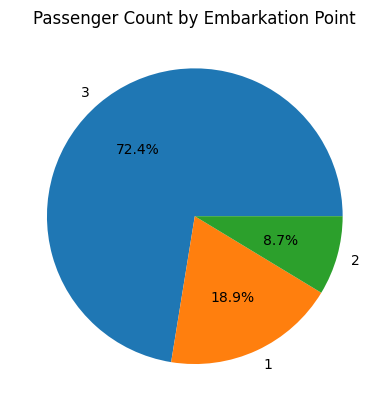

In [ ]:


import matplotlib.pyplot as plt


embark_counts = d['Embarked'].value_counts()

plt.pie(embark_counts.values, labels=embark_counts.index, autopct='%1.1f%%')
_ = plt.title('Passenger Count by Embarkation Point')

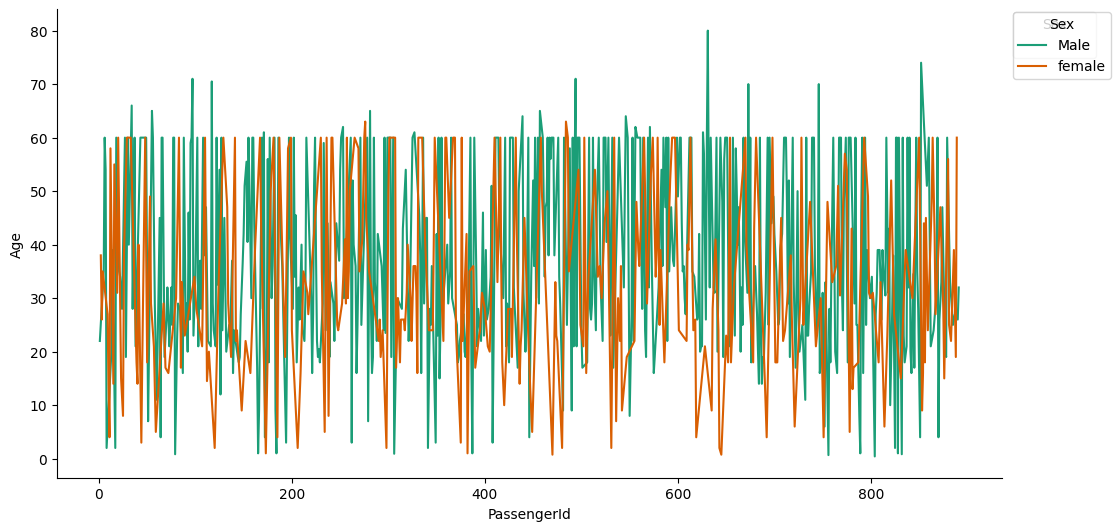

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = d.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Age')

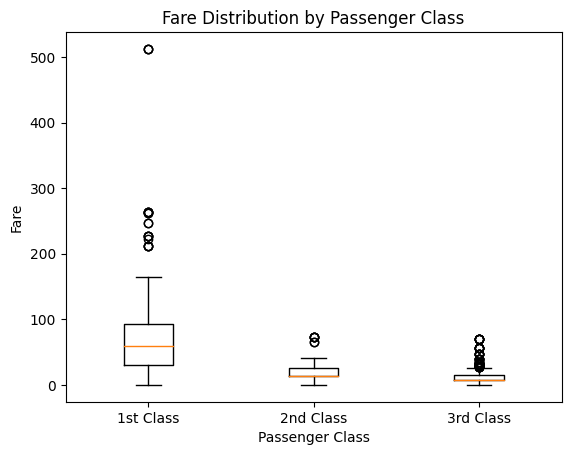

In [ ]:


import matplotlib.pyplot as plt


plt.boxplot([d[d['Pclass'] == 1]['Fare'], d[d['Pclass'] == 2]['Fare'], d[d['Pclass'] == 3]['Fare']], labels=['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
_ = plt.title('Fare Distribution by Passenger Class')

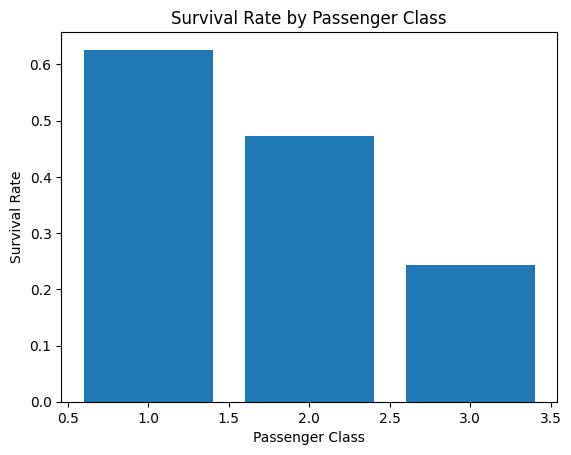

In [ ]:


import matplotlib.pyplot as plt


survival_rate = d.groupby('Pclass')['Survived'].mean()
plt.bar(survival_rate.index, survival_rate.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
_ = plt.title('Survival Rate by Passenger Class')

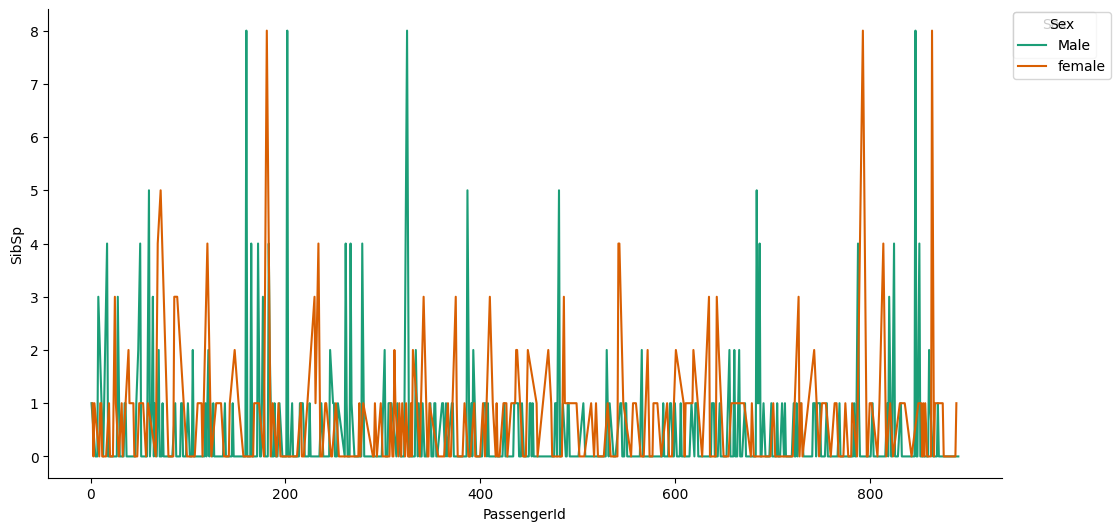

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['SibSp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = d.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('SibSp')

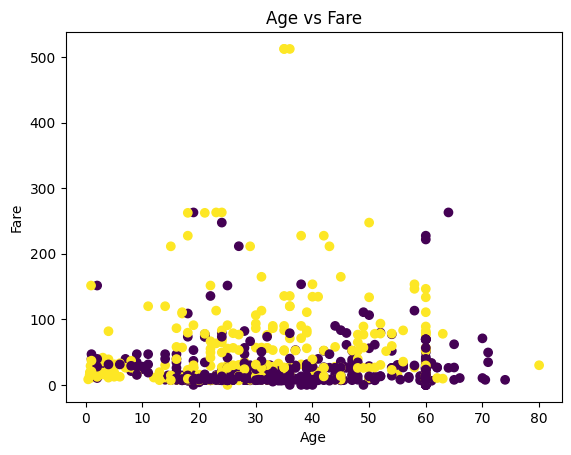

In [ ]:


import matplotlib.pyplot as plt

plt.scatter(d['Age'], d['Fare'], c=d['Survived'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Fare')
_ = plt.title('Age vs Fare')

In [ ]:

# THIS REFERS TO DIABETES ASSIGNMENT



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
e=pd.read_csv("diabetes2.csv")


In [ ]:
e

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


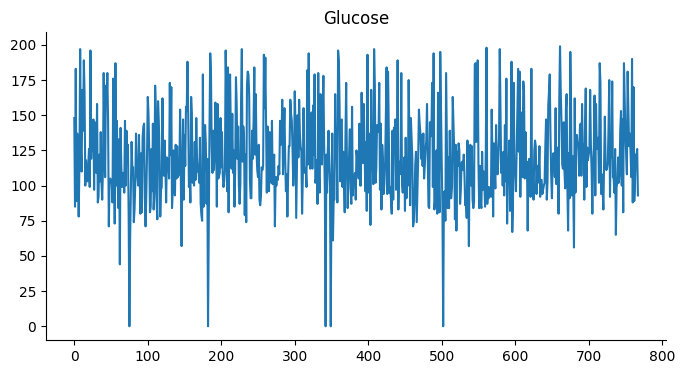

In [ ]:


from matplotlib import pyplot as plt
e['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

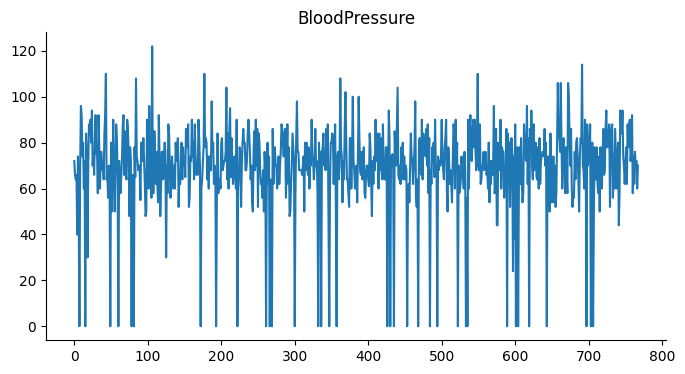

In [ ]:


from matplotlib import pyplot as plt
e['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

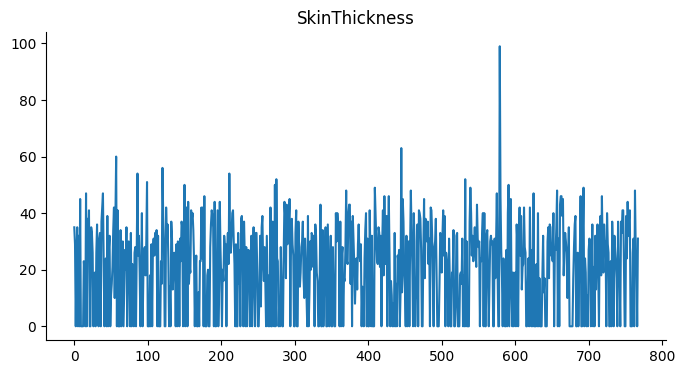

In [ ]:


from matplotlib import pyplot as plt
e['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

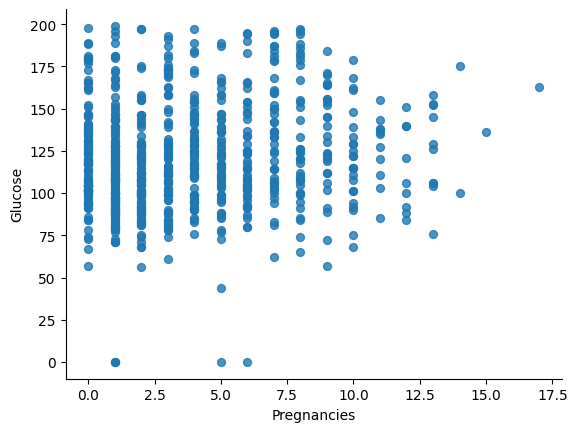

In [ ]:


from matplotlib import pyplot as plt
e.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

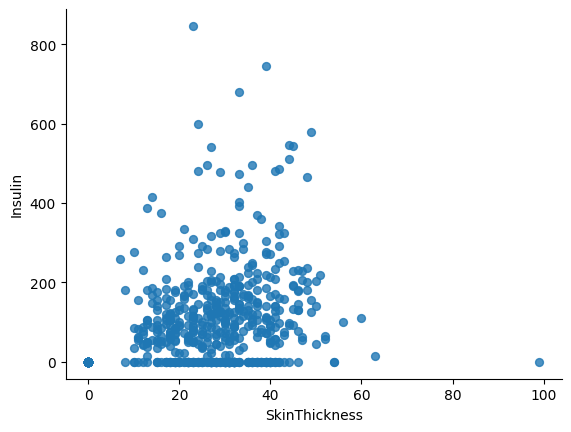

In [ ]:


from matplotlib import pyplot as plt
e.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

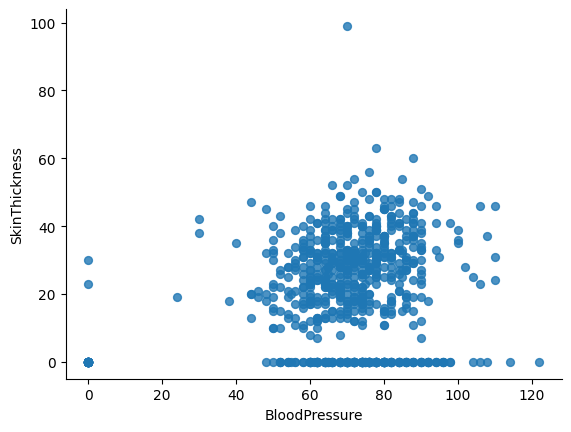

In [ ]:


from matplotlib import pyplot as plt
e.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

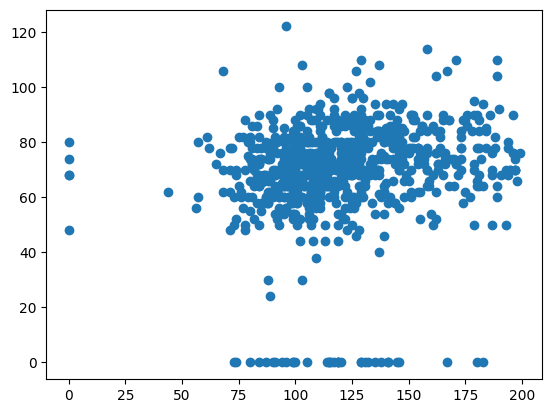

In [ ]:
x=e["Glucose"]
y=e["BloodPressure"]

plt.scatter(x,y)
plt.show()

In [ ]:
e.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
e.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
e.value_counts(["Outcome"])

Outcome
0          500
1          268
Name: count, dtype: int64

In [ ]:
e.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


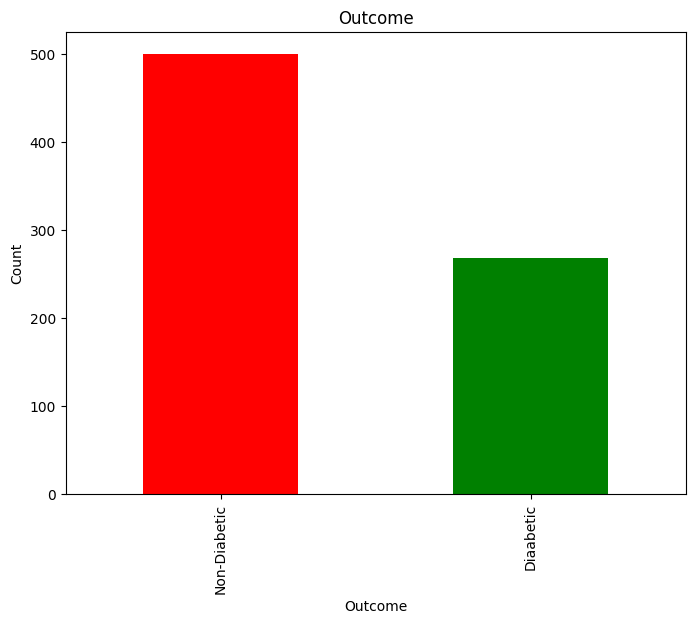

In [ ]:
m=e["Outcome"].value_counts()

plt.figure(figsize=(8,6))
m.plot(kind="bar",color=["red","green"])
plt.title("Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0,1],["Non-Diabetic","Diaabetic"])
plt.show()

In [ ]:
df=pd.read_csv("diabetes2.csv")

df["Insulin"]

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

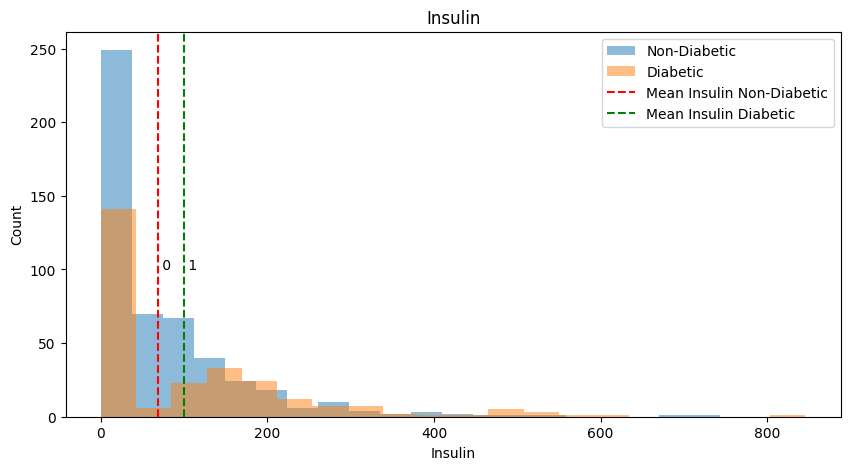

In [ ]:
insulin_non_diabetic=df[df["Outcome"]==0]["Insulin"]
insulin_diabetic=df[df["Outcome"]==1]["Insulin"]

mean_insulin_non_diabetic=np.mean(insulin_non_diabetic)
mean_insulin_diabetic=np.mean(insulin_diabetic)

plt.figure(figsize=(10,5))

plt.hist(insulin_non_diabetic,bins=20,alpha=0.5,label="Non-Diabetic")
plt.hist(insulin_diabetic,bins=20,alpha=0.5,label="Diabetic")

plt.axvline(mean_insulin_non_diabetic,color="red",linestyle="--",label="Mean Insulin Non-Diabetic")
plt.axvline(mean_insulin_diabetic,color="green",linestyle="--",label="Mean Insulin Diabetic")

plt.text(mean_insulin_non_diabetic ,100," 0")
plt.text(mean_insulin_diabetic,100," 1")

plt.title("Insulin")
plt.xlabel("Insulin")
plt.ylabel("Count")
plt.legend()
plt.show()
